In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Data Understanding

## Import Libraries

In [2]:
from src.data.dataset import load_dataset

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 6

In [3]:
%load_ext autoreload
%autoreload 2

## Загрузка данных

In [4]:
df = load_dataset()

## Статистика и визуализации

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Описание переменных**

    - тип (белое или красное)
    - фиксированная кислотность
    - летучая кислотность
    - лимонная кислота
    - остаточный сахар
    - хлориды
    - свободный диоксид серы
    - общий диоксид серы
    - плотность
    - pH
    - сульфаты
    - спирт
    - качество (оценка от 0 до 10)

[Больше информации на сайте Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

### Информация о переменных

Посмотрим общую информацию о переменных. В дата-сете:
- 6497 строк
- type(тип вина) - категориальныя переменная, принимает 2 значения: white и red
- quality (качество вина) - целевая переменная, представлена целыми числами от 0 до 10
- остальные переменные представлены числами с плавающей запятой

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Пропуски в данных

Посмотрим на кол-во пропусков, их немного. Все пропуски в переменных с плавающей запятой.

In [7]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### 2.4.3 Основные статистики

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Можно заметить, что фактичкие значения целевой переменной quality от 3 до 9. А такие переменные, как остаточный сахар и хлориды имеют аномально высокие максимальные значения. Например, для хлоридов это 0.61 при среднем 0.05. Это могут быть как ошибки в данных, так и показатели, влияющие на оценку

### 2.4.4 Взаимосвязь между типом и качеством вина

Посмотрим, влияет ли тип вина (белое или красное), на его качество. В дата-сете приобладает белое вино:

In [9]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

Посмотрим распределение целевой переменной: общее и для каждого типа вина по отдельности

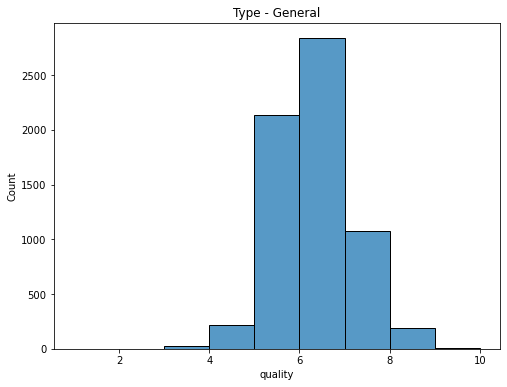

In [10]:
hist = sns.histplot(data=df, x="quality", binwidth=1, binrange=(1, 10))
hist.set(title='Type - General')
plt.show()

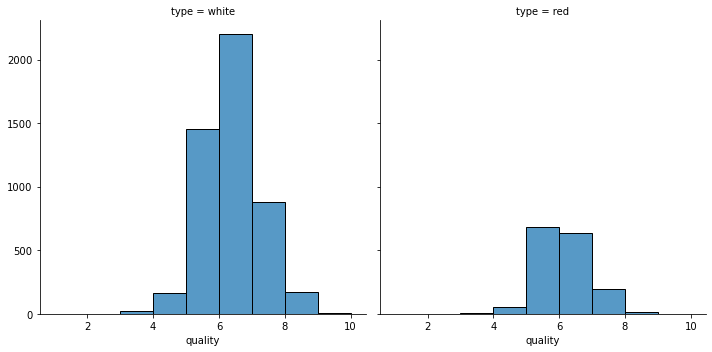

In [11]:
g = sns.FacetGrid(df, col = 'type', height=5, aspect=1)
g.map(sns.histplot, 'quality', binwidth=1, binrange=(1, 10))

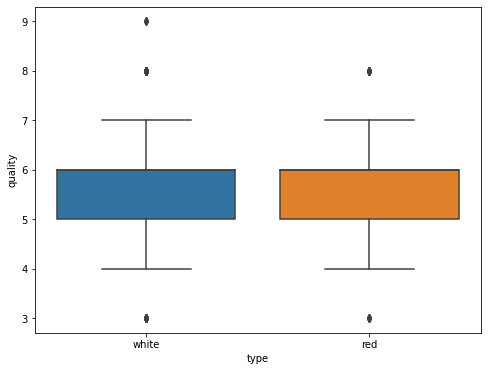

In [12]:
box = sns.boxplot(x="type", y="quality", data=df)
plt.show()

По графикам видно, что чаще всего оценка вина средняя: 5 или 6. При этом белому вину чаще ставится оценка 6, чем 5, а для красного вина доли этих оценок примерно равны.

Если бы нам было достаточно классифицировать вино по качеству(хорошее/плохое/срденее), то тип вина можно было бы не использовать. Но для предстказания точной оценки оставим этот признак. 

### 2.4.5 Тепловая карта корреляции

Посмотрим на корреляцию между переменными, для этого построим тепловую карту.

<AxesSubplot:>

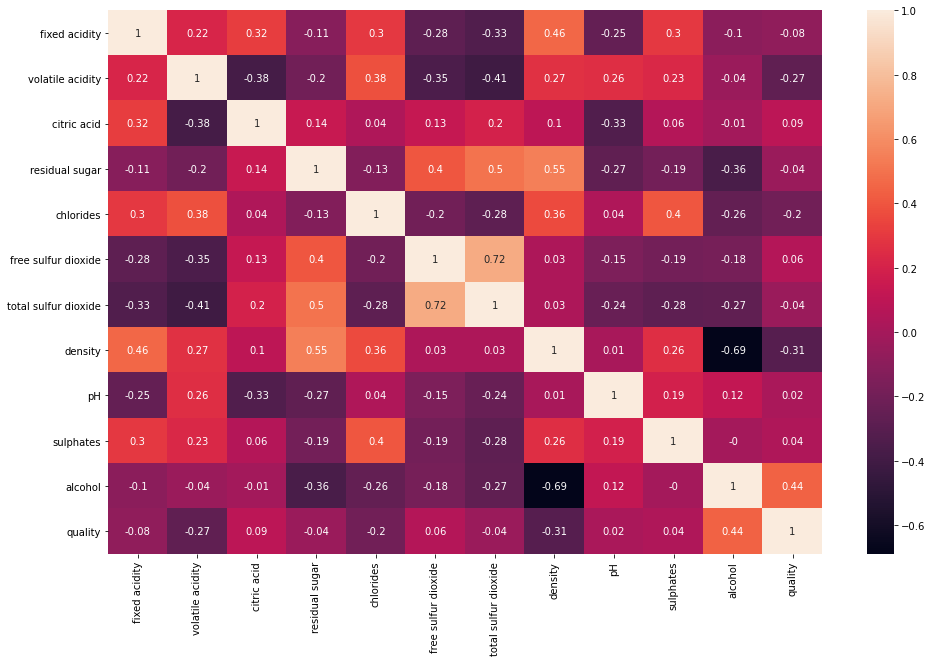

In [13]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr().round(2), annot=True)

На тепловой карте видно, что переменные, которые больше всего коррелируют с качеством вина - это летучая кислотность, плотность и спирт.

### 2.4.6 Визуализация зависимостей качества вина от важных переменных

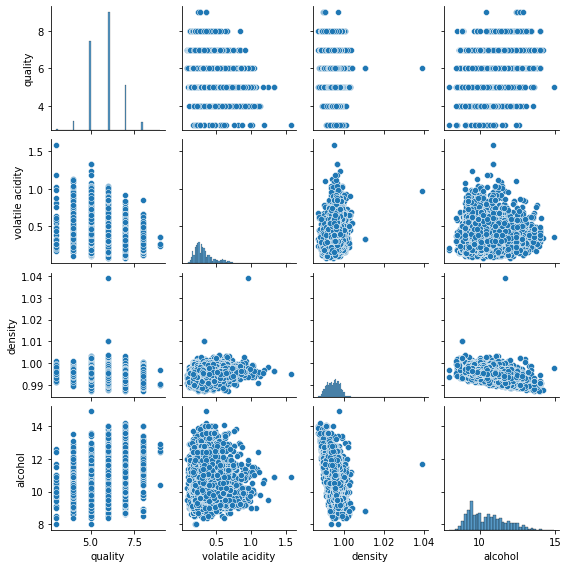

In [15]:
p = sns.pairplot(df[['quality', 'volatile acidity', 'density', 'alcohol']], height=2, aspect=1)
plt.show()